In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

# Explore the data

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


*** Findings: ***
- Credit_History is categorical data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008BDF978>,
      dtype=object)

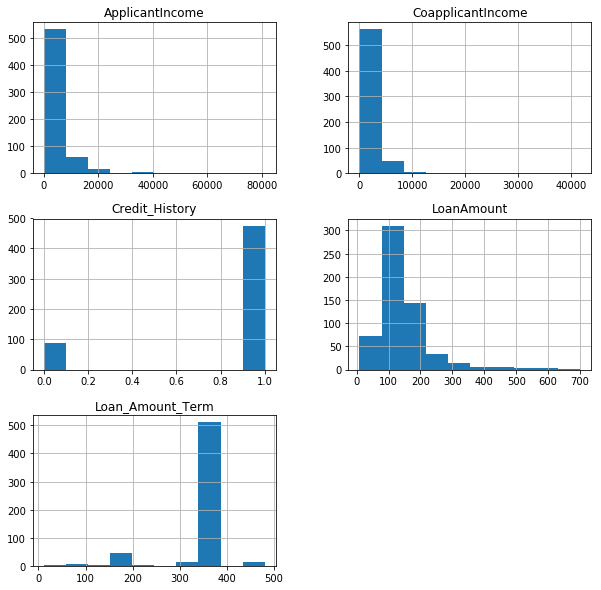

In [5]:
train_df.hist(figsize=(10,10))

*** Findings ***
- Credit_History is categorial data

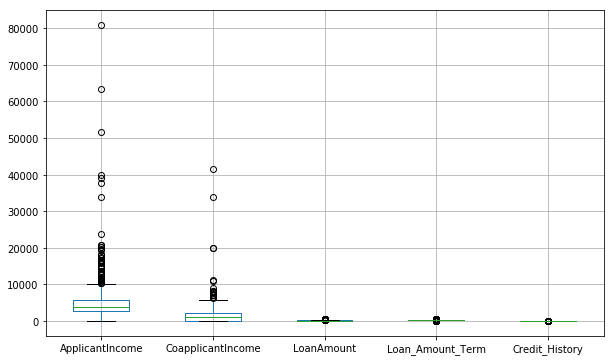

In [6]:
train_df.boxplot(figsize=(10,6))

ApplicantIncome and CoapplicantIncome have huge outliers. At this scale we can not see what is going on for LoanAmount and Loan_Amount_Term. se lets make a seperate boxplot for these two.

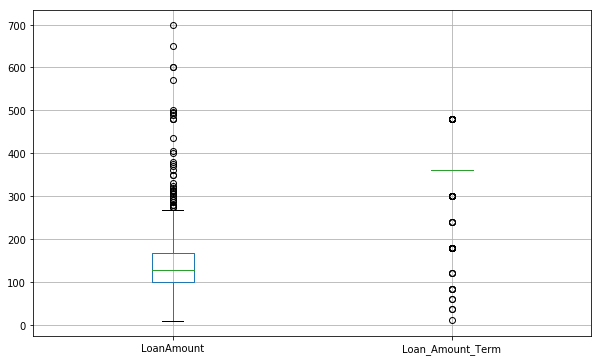

In [7]:
train_df.boxplot(column=['LoanAmount','Loan_Amount_Term'],figsize=(10,6))

*** Findings: ***
- Loan_Amount_Term has one most common value
- Both features have outliers

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [9]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


The test data does not have the target value included and there is no seperate file with the Loan_Status of the test data. 

# What features are categorical?
Get the features with a low number of unique values, these are probably catecorical data.

In [10]:
unique_values_df = pd.DataFrame()
for col in train_df.columns:
    unique_values_df[col] = [len(train_df[col].unique())]
                                
unique_values_df = unique_values_df.transpose().reset_index()
unique_values_df.columns=['Column','Nr of unique values']
unique_values_df[unique_values_df['Nr of unique values']<100]

,Column,Nr of unique values
1,Gender,3
2,Married,3
3,Dependents,5
4,Education,2
5,Self_Employed,3
9,Loan_Amount_Term,11
10,Credit_History,3
11,Property_Area,3
12,Loan_Status,2


In [11]:
for col in unique_values_df[unique_values_df['Nr of unique values']<100]['Column']:
    print ('Unique values for feature: ', col)
    print (train_df[col].value_counts(dropna=False))
    print ('\n')

Unique values for feature:  Gender
Male      489
Female    112
NaN        13
Name: Gender, dtype: int64


Unique values for feature:  Married
Yes    398
No     213
NaN      3
Name: Married, dtype: int64


Unique values for feature:  Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64


Unique values for feature:  Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Unique values for feature:  Self_Employed
No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64


Unique values for feature:  Loan_Amount_Term
 360.0    512
 180.0     44
 480.0     15
NaN        14
 300.0     13
 84.0       4
 240.0      4
 120.0      3
 36.0       2
 60.0       2
 12.0       1
Name: Loan_Amount_Term, dtype: int64


Unique values for feature:  Credit_History
 1.0    475
 0.0     89
NaN      50
Name: Credit_History, dtype: int64


Unique values for feature:  Property_Area
Semiurban    233
Urban        202
Rural        179


## What if we drop all Na values?

In [12]:
data = train_df.dropna()
(train_df.shape[0] - data.shape[0])/train_df.shape[0]

0.2182410423452769

21.8 procent of all data would be dropped, that is alot, so dropping all the rows with NaN values will have significant impact.

In [13]:
data = test_df.dropna()
(test_df.shape[0] - data.shape[0])/test_df.shape[0]

0.2125340599455041

Simular NaN values on the test data.

# Missing values
Above already indicates that there are missing values. Which features have missing values and what fraction is missing?

In [14]:
missing_series = train_df.isnull().sum() / train_df.shape[0]
#missing_stats = pd.DataFrame(missing_series).rename(columns = {'index': 'feature', 0: 'missing_fraction'})
missing_stats = pd.DataFrame(missing_series).reset_index()
missing_stats.columns = ['feature','missing_fraction_train']
missing_stats

,feature,missing_fraction_train
0,Loan_ID,0.000000
1,Gender,0.021173
2,Married,0.004886
3,Dependents,0.024430
4,Education,0.000000
5,Self_Employed,0.052117
6,ApplicantIncome,0.000000
7,CoapplicantIncome,0.000000
8,LoanAmount,0.035831
9,Loan_Amount_Term,0.022801


Is the test data simular? Does the test data have the same missing values?


In [15]:
missing_series = test_df.isnull().sum() / test_df.shape[0]
#missing_stats = pd.DataFrame(missing_series).rename(columns = {'index': 'feature', 0: 'missing_fraction'})
missing_stats_test = pd.DataFrame(missing_series).reset_index()
missing_stats_test.columns = ['feature','missing_fraction_test']
missing_stats_combined = missing_stats.merge(missing_stats_test, left_on='feature',right_on='feature')
missing_stats_combined

,feature,missing_fraction_train,missing_fraction_test
0,Loan_ID,0.000000,0.000000
1,Gender,0.021173,0.029973
2,Married,0.004886,0.000000
3,Dependents,0.024430,0.027248
4,Education,0.000000,0.000000
5,Self_Employed,0.052117,0.062670
6,ApplicantIncome,0.000000,0.000000
7,CoapplicantIncome,0.000000,0.000000
8,LoanAmount,0.035831,0.013624
9,Loan_Amount_Term,0.022801,0.016349


*** Findings: ***
- None of the columns has more that 60% missing values.
- Married has no missing values in the test data, but is missing values in the train_data
- Credit History has the largest number of missing values.

## What to do with the missing values?

Missing values per column, what to do?
Categorical data with missing values:
- Gender: string data
- Married: This is not missing in the test data
- Dependents: int data
- Self_Employed: string data
- Credit_History: large amount of data is missing

Options for categorical data:
1. Drop the NaN rows
2. Ignore the NaN category
3. Make a seperate category for the NaN data
4. Fill with a learning or other mechanism

Number data with NaN values:
- LoanAmount: float data
- Loan_Amount_Term: float data

Options:
1. Drop NaN
2. Replace with average
3. Replace with median value
4. Fill with a learning or other mechanism

**Choose** option 3 because there are outliers for these fields.

With the code below experiments can be done on the different options and the difference in outcome.

In [16]:
def replace_cat_nan_values(df):
    df.Gender.fillna('missing',inplace=True)
    #df.Married.fillna('missing',inplace=True)
    df.Dependents.fillna(-1,inplace=True)
    df.Self_Employed.fillna('missing',inplace=True)
    df.Credit_History.fillna(-1,inplace=True)
    df.dropna(inplace=True) 
    
def replace_nan_values_floats_median(df):
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
    df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
    
def replace_nan_values_floats_mean(df):
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
    df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)    

category_nan_option = 2    
if category_nan_option == 1:    
    train_df.dropna(subset=['Gender','Married','Dependents','Self_Employed','Credit_History'],inplace=True)
    test_df.dropna(subset=['Gender','Married','Dependents','Self_Employed','Credit_History'],inplace=True)
elif category_nan_option == 2:
    print ('No replacements are done for category NaN values, NaN will not get a dummy column')
elif category_nan_option == 3:
    replace_cat_nan_values(train_df)
    replace_cat_nan_values(test_df)
else:
    print ('Not implemented, defaults to option 2')

float_nan_option = 3    
if category_nan_option == 1:    
    train_df.dropna(subset=['LoanAmount','Loan_Amount_Term'],inplace=True)
    test_df.dropna(subset=['LoanAmount','Loan_Amount_Term'],inplace=True)
elif category_nan_option == 2:
    replace_nan_values_floats_mean(train_df)
    replace_nan_values_floats_mean(test_df)
elif category_nan_option == 3:
    replace_nan_values_floats_median(train_df)
    replace_nan_values_floats_median(test_df)
else:
    print ('Not implemented, defaults to option 2') 
    replace_nan_values_floats_median(train_df)
    replace_nan_values_floats_median(test_df)
    
   

No replacements are done for category NaN values, NaN will not get a dummy column


In [17]:
train_df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,150.945488,344.000000,0.541899
Y,5384.068720,1504.516398,144.349606,341.090047,0.981818


In [18]:
def find_features_with_no_variation(df):
    stats = df.describe().transpose()
    return stats[stats['min'] == stats['max']]

find_features_with_no_variation(train_df)

,count,mean,std,min,25%,50%,75%,max


Below only works for the non catecorical. For these no features with a high correlation are found.

In [19]:
def find_features_with_high_correlation(df,treshhold=0.95):
    corr_matrix = df.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # Find index of feature columns with correlation greater than treshhold
    return [column for column in upper.columns if any(upper[column] >treshhold)]

find_features_with_high_correlation(train_df)

[]

## Does having an education affect yearly income? 
Yes.

In [20]:
train_df.groupby('Education')['Education','ApplicantIncome'].mean()

,ApplicantIncome
Education,
Graduate,5857.433333
Not Graduate,3777.283582


## Does yearly income affect the requested loan amount?
No, there is not a strong relation

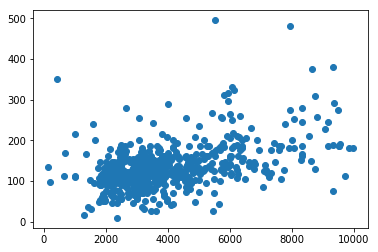

In [21]:
plt.scatter(train_df[train_df['ApplicantIncome']<10000]['ApplicantIncome'],train_df[train_df['ApplicantIncome']<10000]['LoanAmount'])
plt.show()

In [22]:
corr_matrix = train_df.corr().abs()
corr_matrix[['ApplicantIncome','LoanAmount']]

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.565620
CoapplicantIncome,0.116605,0.187828
LoanAmount,0.565620,1.000000
Loan_Amount_Term,0.045242,0.038801
Credit_History,0.014715,0.008301


## Does an education in combination with the requested loan amount affect the approval of a loan?
No, see below.

In [23]:
train_df.groupby(['Education','Loan_Status'])[['Education','Loan_Status','LoanAmount']].mean()

LoanAmount
Education    Loan_Status            
Graduate     N            160.746236
             Y            150.969734
Not Graduate N            124.558862
             Y            116.900297

In [24]:
train_df.groupby(['Education'])[['Education','LoanAmount']].mean()

,LoanAmount
Education,
Graduate,153.821213
Not Graduate,119.872277


In [25]:
train_df.groupby(['Loan_Status'])[['Loan_Status','LoanAmount']].mean()

,LoanAmount
Loan_Status,
N,150.945488
Y,144.349606


*** Findings ***
- Graduates tend to request for higher loans in general
- In general a higher LoanAmount is more likely to be denied, but the difference is small


# Categorical data

In [26]:
unique_values_df = pd.DataFrame()
for col in train_df.columns:
    unique_values_df[col] = [len(train_df[col].unique())]
                                
unique_values_df = unique_values_df.transpose().reset_index()
unique_values_df.columns=['Column','Nr of unique values']
unique_values_df[unique_values_df['Nr of unique values']<100]

,Column,Nr of unique values
1,Gender,3
2,Married,3
3,Dependents,5
4,Education,2
5,Self_Employed,3
9,Loan_Amount_Term,11
10,Credit_History,3
11,Property_Area,3
12,Loan_Status,2


For category data it is the best to convert these to categorical data.

*** Notes: ***
- Noticed that this makes a huge difference for the Credit_History is particular. If this attribute is not converted, the results are very different.

In [27]:
cat_vars=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

cat_df = pd.get_dummies(train_df[cat_vars])
one_hot_features = cat_df.columns

# Add one hot encoded data to original data
train_data_with_cat = pd.concat([cat_df, train_df], axis = 1)
# For Credit_History it does not work in one go because the values are float
train_data_with_cat = pd.concat([train_data_with_cat, pd.get_dummies(train_data_with_cat["Credit_History"], prefix="Credit_History", prefix_sep="_")], axis=1)

# apply the same on test
cat_df = pd.get_dummies(test_df[cat_vars])

# Add one hot encoded data to original data
test_data_with_cat = pd.concat([cat_df, test_df], axis = 1)
test_data_with_cat = pd.concat([test_data_with_cat, pd.get_dummies(test_data_with_cat["Credit_History"], prefix="Credit_History", prefix_sep="_")], axis=1)

cat_vars.append('Credit_History')

In [28]:
y_cols = ['Loan_Status']

# 'Loan_ID' has no prediction value
do_not_use = ['Loan_ID']
feature_cols = train_data_with_cat.columns.difference(set(y_cols + cat_vars + do_not_use))
feature_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History_0.0',
       'Credit_History_1.0', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Gender_Female', 'Gender_Male', 'LoanAmount', 'Loan_Amount_Term',
       'Married_No', 'Married_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Self_Employed_No',
       'Self_Employed_Yes'],
      dtype='object')

# Feature selection

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

print ('Number of features before selection:', len(feature_cols))
n_features_to_select = None
rfe = RFE(logreg, n_features_to_select)
rfe = rfe.fit(train_data_with_cat[feature_cols], train_data_with_cat['Loan_Status'] )
print(rfe.support_)
print(rfe.ranking_)

Number of features before selection: 21
[False False  True  True False  True  True False  True False  True  True
 False False  True False  True  True False False False]
[12 11  1  1  5  1  1  7  1  8  1  1  9 10  1  2  1  1  6  3  4]


In [30]:
sellected_cols = feature_cols[rfe.support_].tolist()
sellected_cols


['Credit_History_0.0',
 'Credit_History_1.0',
 'Dependents_1',
 'Dependents_2',
 'Education_Graduate',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Property_Area_Rural',
 'Property_Area_Semiurban']

In [31]:
# try with manual selected columns
#sellected_cols = ['Credit_History_0.0','Credit_History_1.0','Dependents_1','Education_Graduate','Married_No','Property_Area_Semiurban']

The test data does not have the Y column
Since the y values are not known, the test file is not suitable for validation. So a part of the train data is used for testing.

In [32]:
from sklearn import model_selection
X=train_data_with_cat[sellected_cols]
Y=train_data_with_cat['Loan_Status']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)


Try different models. For each model the average accuracy for 10 fold cross validation is calculated. Then 

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def apply_classification_models(X_train,Y_train,X_test,result):
    models = []
    
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    models.append(('RFC', RandomForestClassifier()))

    # evaluate each model in turn
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
     
    #
    # now fit each model on the train data and predict on the test data
    for name, model in models:
        print ('Fitting:' + name)
        model.fit(X_train,Y_train)
        y_pred = model.predict(X_test)

        print('Accuracy of {} on test set: {:.2f}'.format(name,model.score(X_test, Y_test)))
        result['Predicted_by_'+name] = y_pred
    
    return models

result = pd.DataFrame()
models = apply_classification_models(X_train,Y_train,X_test,result)

LR: 0.797121 (0.058265)
LDA: 0.801772 (0.052655)
KNN: 0.776190 (0.061810)
CART: 0.725028 (0.070842)
NB: 0.766888 (0.081246)
SVM: 0.801772 (0.052655)
RFC: 0.738870 (0.056070)
Fitting:LR
Accuracy of LR on test set: 0.83
Fitting:LDA
Accuracy of LDA on test set: 0.83
Fitting:KNN
Accuracy of KNN on test set: 0.82
Fitting:CART
Accuracy of CART on test set: 0.79
Fitting:NB
Accuracy of NB on test set: 0.80
Fitting:SVM
Accuracy of SVM on test set: 0.83
Fitting:RFC
Accuracy of RFC on test set: 0.79


Result of each predictor on the test data.

In [34]:
result.head()

,Predicted_by_LR,Predicted_by_LDA,Predicted_by_KNN,Predicted_by_CART,Predicted_by_NB,Predicted_by_SVM,Predicted_by_RFC
0,Y,Y,Y,Y,Y,Y,Y
1,Y,Y,Y,Y,Y,Y,Y
2,Y,Y,Y,Y,Y,Y,Y
3,Y,Y,Y,Y,Y,Y,Y
4,Y,Y,Y,Y,Y,Y,Y


# But what if we had choosen different ways to clean the missing values?

So lets repeat the code from above an experiment with different clean methods. Experimenting with the code below it turns out that ignoring the nan values (option 2) and replacing the floats with median or mean values gives the best results. 

In fact, the best result are achived by selecting only the 'Credit_History_0.0'. This means that not having a credit history is the best indicator if a loan will be granted. In practice that would not be realy helpfull.


In [35]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

category_nan_option = 2    
if category_nan_option == 1:    
    train_df.dropna(subset=['Gender','Married','Dependents','Self_Employed','Credit_History'],inplace=True)
    test_df.dropna(subset=['Gender','Married','Dependents','Self_Employed','Credit_History'],inplace=True)
elif category_nan_option == 2:
    print ('No replacements are done for category NaN values, NaN will not get a dummy column')
elif category_nan_option == 3:
    replace_cat_nan_values(train_df)
    replace_cat_nan_values(test_df)
else:
    print ('Not implemented, defaults to option 2')

float_nan_option = 3    
if category_nan_option == 1:    
    train_df.dropna(subset=['LoanAmount','Loan_Amount_Term'],inplace=True)
    test_df.dropna(subset=['LoanAmount','Loan_Amount_Term'],inplace=True)
elif category_nan_option == 2:
    replace_nan_values_floats_mean(train_df)
    replace_nan_values_floats_mean(test_df)
elif category_nan_option == 3:
    replace_nan_values_floats_median(train_df)
    replace_nan_values_floats_median(test_df)
else:
    print ('Not implemented, defaults to option 2') 
    replace_nan_values_floats_median(train_df)
    replace_nan_values_floats_median(test_df)

cat_vars=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

cat_df = pd.get_dummies(train_df[cat_vars])
one_hot_features = cat_df.columns

# Add one hot encoded data to original data
train_data_with_cat = pd.concat([cat_df, train_df], axis = 1)
# For Credit_History it does not work in one go because the values are float
train_data_with_cat = pd.concat([train_data_with_cat, pd.get_dummies(train_data_with_cat["Credit_History"], prefix="Credit_History", prefix_sep="_")], axis=1)

# apply the same on test
cat_df = pd.get_dummies(test_df[cat_vars])

# Add one hot encoded data to original data
test_data_with_cat = pd.concat([cat_df, test_df], axis = 1)
test_data_with_cat = pd.concat([test_data_with_cat, pd.get_dummies(test_data_with_cat["Credit_History"], prefix="Credit_History", prefix_sep="_")], axis=1)

cat_vars.append('Credit_History')
y_cols = ['Loan_Status']

# 'Loan_ID' has no prediction value
do_not_use = ['Loan_ID']
feature_cols = train_data_with_cat.columns.difference(set(y_cols + cat_vars + do_not_use))



No replacements are done for category NaN values, NaN will not get a dummy column


Feature selection

*** Notes ***
- Experimenting with the code below it turns out that the 'Credit_History_0.0' is the most defining feature. 
- Setting ```n_features_to_select``` to 1 causes 'Credit_History_0.0' to be the selected feature and with this one feature selected the results are the same!

In [36]:
logreg = LogisticRegression()

print ('Number of features before selection:', len(feature_cols))
n_features_to_select = None
rfe = RFE(logreg, n_features_to_select)
rfe = rfe.fit(train_data_with_cat[feature_cols], train_data_with_cat['Loan_Status'] )
print(rfe.support_)
print(rfe.ranking_)

Number of features before selection: 21
[False False  True  True False  True  True False  True False  True  True
 False False  True False  True  True False False False]
[12 11  1  1  5  1  1  7  1  8  1  1  9 10  1  2  1  1  6  3  4]


In [37]:
sellected_cols = feature_cols[rfe.support_].tolist()
sellected_cols

['Credit_History_0.0',
 'Credit_History_1.0',
 'Dependents_1',
 'Dependents_2',
 'Education_Graduate',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Property_Area_Rural',
 'Property_Area_Semiurban']

In [38]:
# try with manual selected columns
manual_select_columns = False
if manual_select_columns:
    sellected_cols = ['Property_Area_Semiurban']

In [39]:
from sklearn.cross_validation import train_test_split
X=train_data_with_cat[sellected_cols]
Y=train_data_with_cat['Loan_Status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
result = pd.DataFrame()
models = apply_classification_models(X_train,Y_train,X_test,result)

LR: 0.797121 (0.058265)
LDA: 0.801772 (0.052655)


C:\Users\nl11076\AppData\Local\conda\conda\envs\Data\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


KNN: 0.776190 (0.061810)
CART: 0.725028 (0.070842)
NB: 0.766888 (0.081246)
SVM: 0.801772 (0.052655)
RFC: 0.748228 (0.058726)
Fitting:LR
Accuracy of LR on test set: 0.83
Fitting:LDA
Accuracy of LDA on test set: 0.83
Fitting:KNN
Accuracy of KNN on test set: 0.82
Fitting:CART
Accuracy of CART on test set: 0.79
Fitting:NB
Accuracy of NB on test set: 0.80
Fitting:SVM
Accuracy of SVM on test set: 0.83
Fitting:RFC
Accuracy of RFC on test set: 0.81


# What is the realation between 'Loan_Status' and 'Credit_History'?

In [40]:
pd.crosstab(train_df['Loan_Status'],train_df['Credit_History'].astype(str),normalize='columns' )

Credit_History,0.0,1.0,nan
Loan_Status,,,
N,0.921348,0.204211,0.26
Y,0.078652,0.795789,0.74


In [41]:
train_df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# So how usefull is the Logistic regerssion model?
The Logistic regression model above gets a 0.83 accuracy. That seems the best, but how usefull and good is this really?

In [42]:
# merge the original fields back to the test
cols = train_data_with_cat.columns.difference(X_test.columns)
X_test_all = pd.merge(X_test,train_data_with_cat[cols],left_index=True,right_index=True)
X_test_all['Credit_History'].isnull().sum()

13

In [43]:
# merge back to the result
result = pd.merge(result,X_test_all.reset_index(),left_index=True,right_index=True)
result.head()

,Predicted_by_LR,Predicted_by_LDA,Predicted_by_KNN,Predicted_by_CART,Predicted_by_NB,Predicted_by_SVM,Predicted_by_RFC,index,Credit_History_0.0,Credit_History_1.0,...,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Married_Yes,Property_Area,Property_Area_Urban,Self_Employed,Self_Employed_No,Self_Employed_Yes
0,Y,Y,Y,Y,Y,Y,Y,454,0,1,...,360.0,LP002453,Y,No,0,Semiurban,0,Yes,0,1
1,Y,Y,Y,Y,Y,Y,Y,52,0,1,...,360.0,LP001164,N,No,0,Semiurban,0,No,1,0
2,Y,Y,Y,Y,Y,Y,Y,536,0,1,...,360.0,LP002734,Y,Yes,1,Urban,1,No,1,0
3,Y,Y,Y,Y,Y,Y,Y,469,0,1,...,360.0,LP002505,N,Yes,1,Urban,1,No,1,0
4,Y,Y,Y,Y,Y,Y,Y,55,0,1,...,360.0,LP001194,Y,Yes,1,Semiurban,0,No,1,0


In [44]:
result[result['Credit_History'].isnull()].head()[['Credit_History','Credit_History_0.0','Predicted_by_LR','Predicted_by_RFC','Loan_Status']]

,Credit_History,Credit_History_0.0,Predicted_by_LR,Predicted_by_RFC,Loan_Status
16,NaN,0,Y,Y,N
18,NaN,0,Y,Y,Y
24,NaN,0,Y,Y,Y
55,NaN,0,Y,Y,Y
66,NaN,0,Y,Y,Y


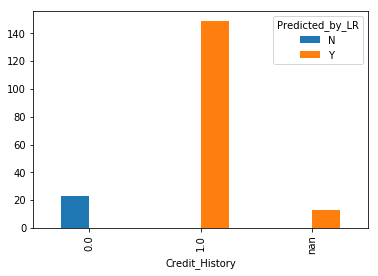

In [45]:
pd.crosstab(result['Credit_History'].astype(str),result['Predicted_by_LR']).plot(kind='bar')

In [46]:
pd.crosstab(result['Credit_History'].astype(str),result['Predicted_by_LR'])

Predicted_by_LR,N,Y
Credit_History,,
0.0,23,0
1.0,0,149
nan,0,13


In [47]:
pd.crosstab(result['Credit_History'].astype(str),result['Predicted_by_RFC'])

Predicted_by_RFC,N,Y
Credit_History,,
0.0,23,0
1.0,6,143
nan,2,11


In [48]:
pd.crosstab(result['Credit_History'].astype(str),result['Credit_History_0.0'].astype(str))

Credit_History_0.0,0,1
Credit_History,,
0.0,0,23
1.0,149,0
nan,13,0


It seems that the Logistic Regression model has learned to always grant the request if there was credit history, and always deny if there was no history. That is not helpfull because using this method no new people would ever get a loan! The method that was used to deal with the NaN values causes all cases where the Credit_History did not have a value to grant the loan.

# Evaluations per model

  Model       ACC
0    LR  0.827027
1   LDA  0.827027
2   SVM  0.827027
3   KNN  0.821622
4   RFC  0.805405
5    NB  0.800000
6  CART  0.789189


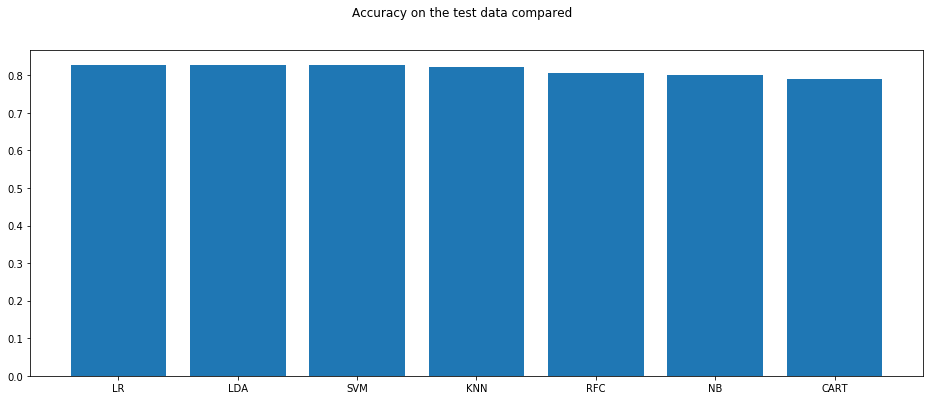

  Model  Precision
0    LR   0.913043
1   LDA   0.913043
2   SVM   0.913043
3   KNN   0.821429
4   RFC   0.741935
5    NB   0.705882
6  CART   0.657895


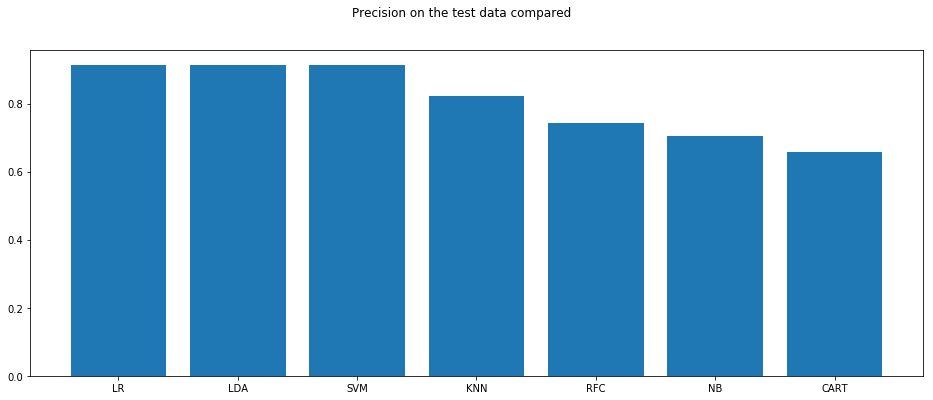

  Model    Recall
0  CART  0.490196
1    NB  0.470588
2   KNN  0.450980
3   RFC  0.450980
4    LR  0.411765
5   LDA  0.411765
6   SVM  0.411765


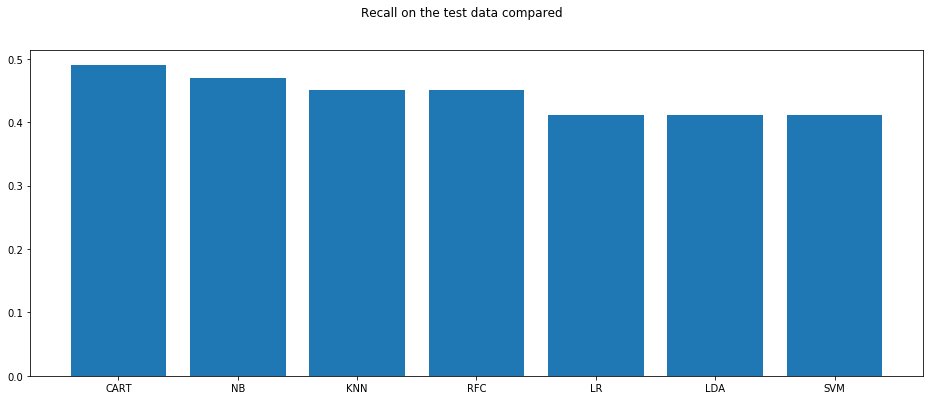

  Model        F1
0   KNN  0.582278
1    LR  0.567568
2   LDA  0.567568
3   SVM  0.567568
4    NB  0.564706
5  CART  0.561798
6   RFC  0.560976


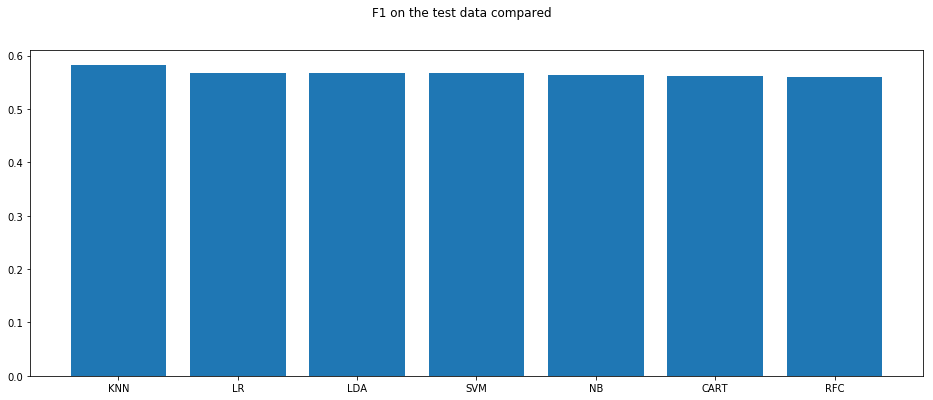

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def get_classification_statistics(y_true,y_pred,labels,pos_label=None):
    if pos_label == None:
        pos_label = labels[0]
    precision = precision_score(y_true, y_pred,pos_label=labels[0],labels=labels)
    recall = recall_score(y_true, y_pred,pos_label=labels[0],labels=labels)
    f1 = 2 * (precision * recall) / (precision + recall)
    acc =  accuracy_score (y_true, y_pred)
    return acc, precision,recall,f1

def plot_dict(info_dict,columns,title):
    model_overview_list = sorted([[name, val] for name, val in info_dict.items()], key = lambda x: x[1],reverse=True)

    names = [x[0] for x in model_overview_list]
    values = [x[1] for x in model_overview_list]

    print( pd.DataFrame(model_overview_list,columns=columns))

    fig = plt.figure(figsize = (16, 6))
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    plt.bar(range(len(values)), values, align='center')
    plt.xticks(range(len(names)), names)
    plt.show()

def plot_model_compare_classification(model_names,y_col,results,labels):
    model_overview_acc = {}
    model_overview_precision = {}
    model_overview_recall = {}
    model_overview_f1 = {}
    for name in model_names:
        acc, precision,recall,f1 = get_classification_statistics(results[y_col],results['Predicted_by_'+name],labels)
        
        model_overview_acc[name] = acc
        model_overview_precision[name] = precision
        model_overview_recall[name] = recall
        model_overview_f1[name] = f1
        
    plot_dict(model_overview_acc,['Model','ACC'],'Accuracy on the test data compared')
    plot_dict(model_overview_precision,['Model','Precision'],'Precision on the test data compared')
    plot_dict(model_overview_recall,['Model','Recall'],'Recall on the test data compared')
    plot_dict(model_overview_f1,['Model','F1'],'F1 on the test data compared')
    
labels = ['N','Y']
model_names = [name for name,model in models]
plot_model_compare_classification(model_names,'Loan_Status',result,labels)
    

### Confusion matrix 

In [50]:
pd.crosstab(result['Loan_Status'],result['Predicted_by_LR'])


Predicted_by_LR,N,Y
Loan_Status,,
N,21,30
Y,2,132


### Precision, recall, F-measure and support

In [51]:
print(classification_report(result['Loan_Status'],result['Predicted_by_LR']))

             precision    recall  f1-score   support

          N       0.91      0.41      0.57        51
          Y       0.81      0.99      0.89       134

avg / total       0.84      0.83      0.80       185

